rolling beta, rolling p-value , rolling R2, rolling beta, show the residual plot.

Easy as.

In [1]:
from helper import get_polygon_data, get_rolling_beta, get_rolling_stats, get_heatmap, plot_residuals, plot_regression_analysis
from helper import get_percentiles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
ticker = "AAPL"
bench_ticker = "SPY"

ticker_prices = get_polygon_data(ticker)[["close", "timestamp"]]
bench_prices = get_polygon_data(bench_ticker)[["close"]]
ticker_prices["pct_change"] = ticker_prices["close"].pct_change()
ticker_prices.columns = ["ticker_close", "date", "ticker_pct"]
bench_prices["pct_change"] = bench_prices["close"].pct_change()
bench_prices.columns = ["bench_close", "bench_pct"]
ticker_prices["date"] = pd.to_datetime(ticker_prices["date"], unit = "ms")




In [3]:
get_rolling_beta(ticker_prices, bench_prices, 60)


1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
          ...   
2788    0.662946
2789    0.639735
2790    0.644809
2791    0.609802
2792    0.611947
Length: 2792, dtype: float64

In [4]:
stats = get_rolling_stats(ticker_prices, bench_prices, 60)


In [5]:
plot_data = pd.concat([ticker_prices, bench_prices, stats], axis = 1).dropna()
plot_data["residuals"] = plot_data["ticker_pct"] - (plot_data["beta"] * plot_data["bench_pct"] + plot_data["const"])
plot_data


,ticker_close,date,ticker_pct,bench_close,bench_pct,const,beta,p-value,r-squared,residuals
59,31.5925,2015-03-30 04:00:00,0.025314,208.250,0.012200,0.002341,0.993321,0.000013,0.249768,0.010855
60,31.1075,2015-03-31 04:00:00,-0.015352,206.430,-0.008739,0.002188,1.010726,0.000007,0.258571,-0.008707
61,31.0625,2015-04-01 04:00:00,-0.001447,205.700,-0.003536,0.002408,0.958502,0.000035,0.227944,-0.000465
62,31.3300,2015-04-02 04:00:00,0.008612,206.435,0.003573,0.002332,0.976561,0.000029,0.231374,0.002790
63,31.8375,2015-04-06 04:00:00,0.016199,207.830,0.006758,0.002455,0.989162,0.000030,0.230787,0.007059
...,...,...,...,...,...,...,...,...,...,...
2788,276.4900,2026-02-04 05:00:00,0.026013,686.190,-0.004844,0.000204,0.662946,0.001200,0.153165,0.029020
2789,275.9100,2026-02-05 05:00:00,-0.002098,677.620,-0.012489,0.000403,0.639735,0.001318,0.151021,0.005489
2790,278.1200,2026-02-06 05:00:00,0.008010,690.620,0.019185,0.000438,0.644809,0.000941,0.158685,-0.004798
2791,274.6200,2026-02-09 05:00:00,-0.012584,693.950,0.004822,-0.000149,0.609802,0.001521,0.147725,-0.015376


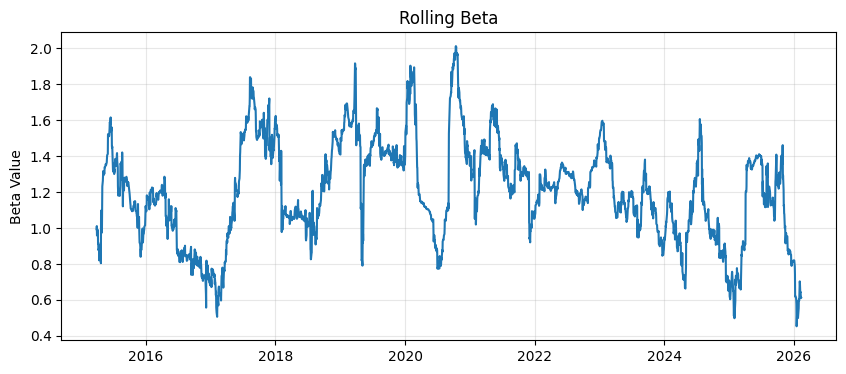

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data["date"], plot_data['beta'],  label='Rolling Beta')
plt.title('Rolling Beta')
plt.ylabel('Beta Value')
plt.grid(True, alpha=0.3)
plt.show()


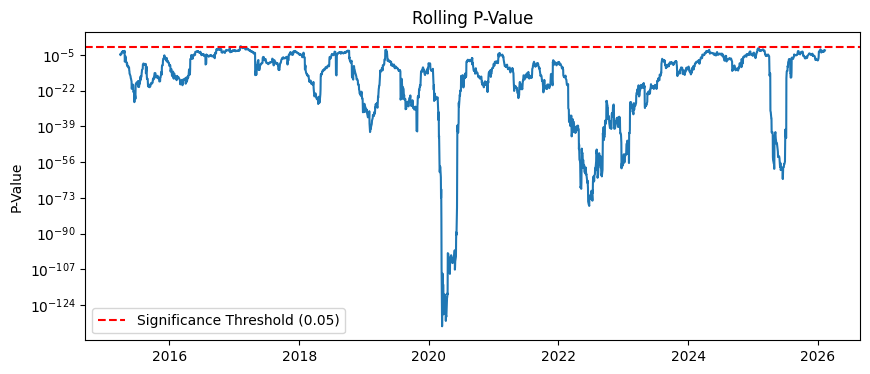

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data["date"], plot_data['p-value'])
# Significance threshold at 0.05
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.yscale('log') # Useful because p-values can be extremely small
plt.title('Rolling P-Value')
plt.ylabel('P-Value')
plt.legend()
plt.show()


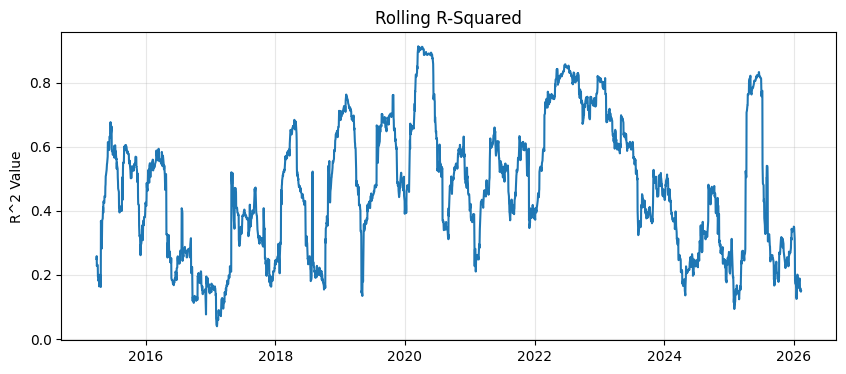

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(plot_data["date"], plot_data['r-squared'])
plt.title('Rolling R-Squared')
plt.ylabel('R^2 Value')
plt.grid(True, alpha=0.3)
plt.show()


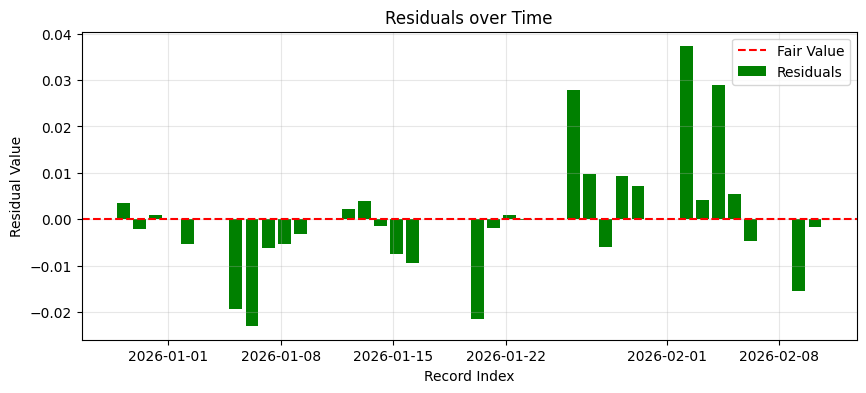

In [16]:
plot_residuals(plot_data.iloc[-30:])




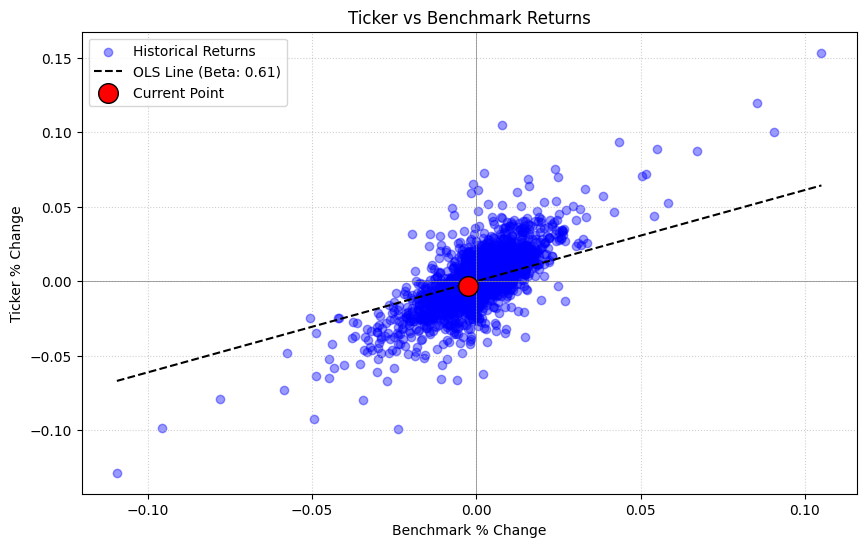

In [10]:
plot_regression_analysis(plot_data)


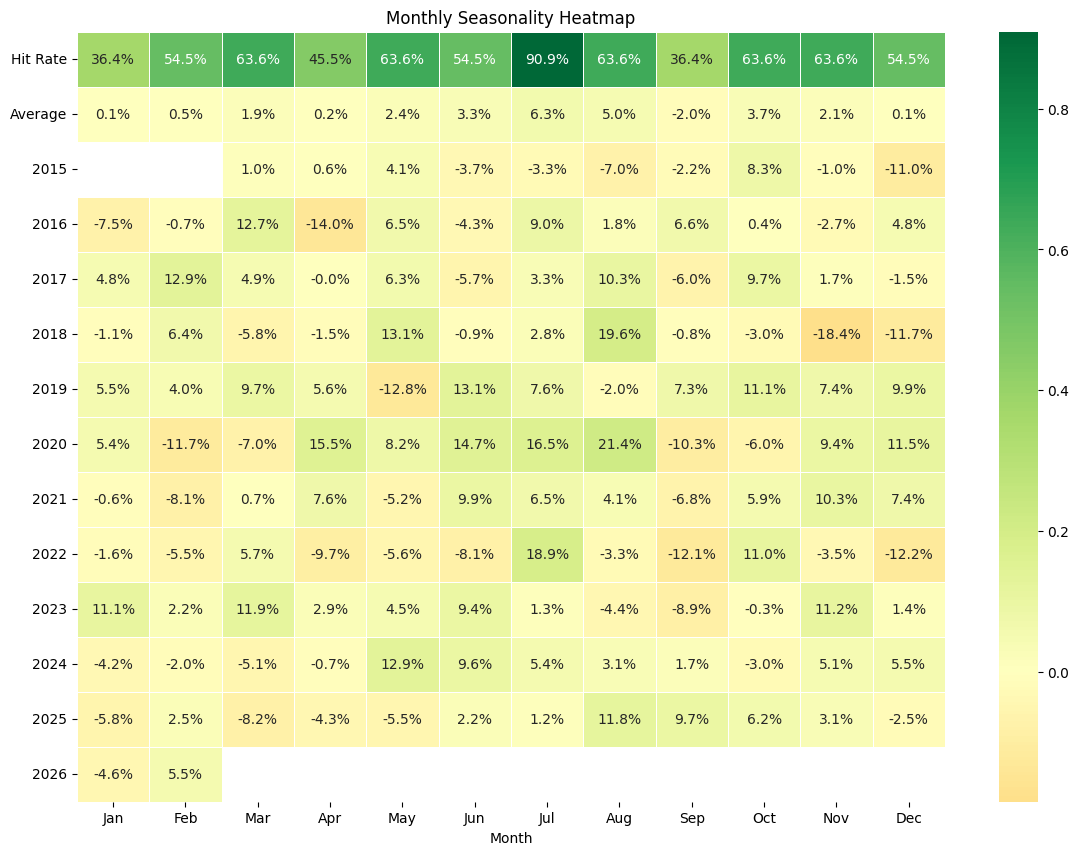

In [11]:
plot_data['Year'] = plot_data['date'].dt.year
plot_data['Month'] = plot_data['date'].dt.month  # Keeps it 1-12 for sorting
get_heatmap(plot_data)


In [12]:
year_data = plot_data[plot_data["Year"] == plot_data["Year"].unique()[-1]]



In [13]:
steps = 252 - year_data.shape[0]
time_left = (steps)/252
median, tenth_percentile, ninetieth_percentile= get_percentiles(plot_data, year_data, days_left = steps)



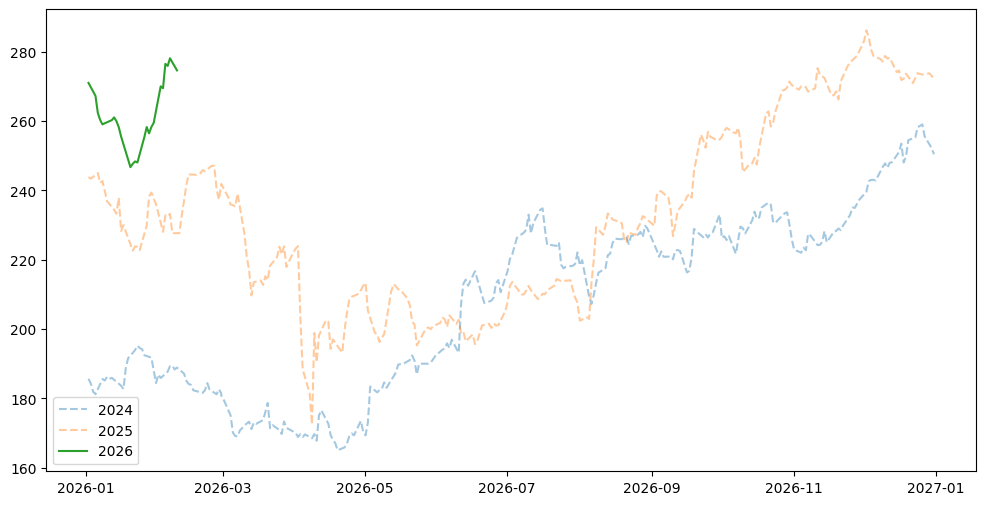

In [17]:
med_price = (pd.concat([year_data["ticker_close"], pd.Series(ninetieth_percentile)]))
plt.figure(figsize = (12, 6))
for i, year in enumerate(plot_data["Year"].unique()[-3:-1]):
    temp = plot_data.copy()[plot_data["Year"] == year]
    temp["date"] = temp["date"] + pd.DateOffset(years = 2 - i)
    plt.plot(temp["date"], temp["ticker_close"], alpha = 0.4, linestyle = "--", label = year)

plt.plot(year_data["date"].iloc[:-1], year_data["ticker_close"].iloc[:-1], label = 2026)


plt.legend()
plt.show()


In [15]:
med_price[0:28]


2766    271.01
2767    267.26
2768    262.36
2769    260.33
2770    259.04
2771    259.37
2772    260.25
2773    261.05
2774    259.96
2775    258.21
2776    255.53
2777    246.70
2778    247.65
2779    248.35
2780    248.04
2781    255.41
2782    258.27
2783    256.44
2784    258.28
2785    259.48
2786    270.01
2787    269.48
2788    276.49
2789    275.91
2790    278.12
2791    274.62
2792    273.68
0       273.68
dtype: float64